This notebook investigates the ten lowest totals for the WIT outputs for polygons in the QLD 2022 delivery

| xxx\_uid       |  date\_time                |  pc\_missing |  bs    |  pv    |  npv   |  wet   |  water |  total |
| -------------- | -------------------------- | ------------ | ------ | ------ | ------ | ------ | ------ | ------ |
| 2019V6\_354827 |  2004-05-28T09:28:48+10:00 | 0            | 0.1376 | 0.0995 | 0.13   | 0      | 0      | 0.3671 |
| 2019V6\_343868 |  2004-05-28T09:28:48+10:00 | 0            | 0.2176 | 0.2341 | 0.1095 | 0.027  | 0      | 0.5882 |
| 2019V6\_354614 |  2004-05-28T09:28:48+10:00 | 0            | 0.4147 | 0.2041 | 0      | 0      | 0      | 0.6188 |
| 2019V6\_163900 |  2003-07-13T09:24:16+10:00 | 0.0526       | 0.6211 | 0.0217 | 0.0261 | 0.0556 | 0.1111 | 0.8356 |
| 2019V6\_353792 |  1991-05-18T09:04:34+10:00 | 0            | 0      | 0.0021 | 0.8489 | 0      | 0      | 0.851  |
| 2019V6\_184146 |  1991-05-18T09:04:34+10:00 | 0            | 0      | 0.0006 | 0.8525 | 0      | 0      | 0.8531 |
| 2019V6\_353057 |  2021-05-12T08:50:23+10:00 | 0            | 0      | 0.2931 | 0.5623 | 0      | 0      | 0.8554 |
| 2019V6\_360155 |  1998-08-14T09:37:55+10:00 | 0            | 0.5095 | 0.2625 | 0.0835 | 0      | 0      | 0.8555 |
| 2019V6\_369659 |  2021-05-12T08:50:23+10:00 | 0            | 0      | 0.1486 | 0.7086 | 0      | 0      | 0.8572 |
| 2019V6\_178911 |  2021-05-12T08:50:23+10:00 | 0            | 0      | 0.2245 | 0.6355 | 0      | 0      | 0.86   |


Load packages

In [14]:
%matplotlib inline

import datacube
import geopandas as gpd
from datacube.utils import geometry
import matplotlib.pyplot as plt

import sys
sys.path.insert(1, '../Tools/')
from dea_tools.datahandling import download_unzip
from dea_tools.datahandling import load_ard
from dea_tools.plotting import rgb
from dea_tools.spatial import xr_rasterize

Connect to the datacube

In [5]:
dc = datacube.Datacube(app='WIT qc')

In [9]:
polygon_to_drill = './ten_lowest/ten_lowest_shp.shp' #will need to select first polygon

In [10]:
time_to_drill = ('2004-05-27', '2004-05-27')

In [11]:
# Read unzipped shapefile
polygon_to_drill = gpd.read_file(polygon_to_drill)

In [12]:
# Check that the polygon loaded as expected. We'll just print the first 3 rows to check
polygon_to_drill.head(3)

,XXX_UID,Shape_Leng,Shape_Area,geometry
0,2019V6_163900,725.634741,16440.163158,"POLYGON ((153.04718 -25.96200, 153.04722 -25.9..."
1,2019V6_178911,430.195730,9209.604988,"POLYGON ((152.99961 -26.90726, 152.99940 -26.9..."
2,2019V6_184146,809.541931,12966.603872,"POLYGON ((152.87801 -26.82835, 152.87832 -26.8..."


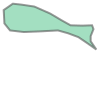

In [13]:
geom = geometry.Geometry(geom=polygon_to_drill.iloc[0].geometry, 
                         crs=polygon_to_drill.crs)
geom

Set up the dc.load query

In [18]:
query = {'geopolygon': geom,
         'time': time_to_drill,
         'output_crs': 'EPSG:3577',
         'resolution': (-30, 30),
         'measurements': ['nbart_red', 
                          'nbart_green', 
                          'nbart_blue',]
        }

Use the query to extract data

In [19]:
# Load available data from all three Landsat satellites
ds = load_ard(dc=dc,
              products=['ga_ls5t_ard_3', 'ga_ls7e_ard_3', 'ga_ls8c_ard_3'], group_by='solar_day', **query)

Finding datasets
    ga_ls5t_ard_3
    ga_ls7e_ard_3
    ga_ls8c_ard_3
Applying pixel quality/cloud mask
Loading 1 time steps


In [20]:
# Print output data
ds

<xarray.Dataset>
Dimensions:      (time: 1, y: 7, x: 9)
Coordinates:
  * time         (time) datetime64[ns] 2004-05-27T23:28:48.317490
  * y            (y) float64 -2.981e+06 -2.982e+06 ... -2.982e+06 -2.982e+06
  * x            (x) float64 2.073e+06 2.073e+06 ... 2.073e+06 2.073e+06
    spatial_ref  int32 3577
Data variables:
    nbart_red    (time, y, x) float32 312.0 365.0 420.0 ... 288.0 292.0 294.0
    nbart_green  (time, y, x) float32 348.0 349.0 352.0 ... 266.0 386.0 330.0
    nbart_blue   (time, y, x) float32 161.0 129.0 163.0 ... 89.0 120.0 121.0
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

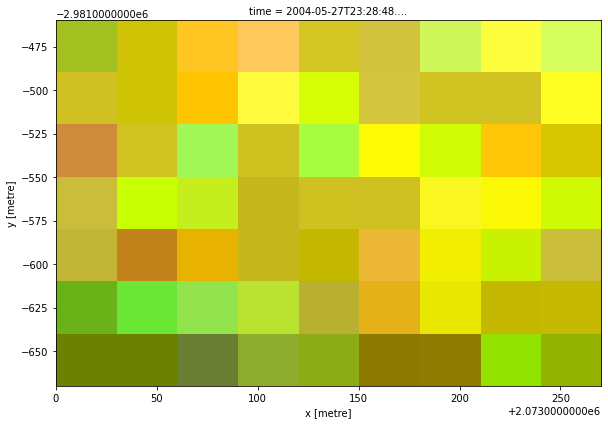

In [23]:
rgb(ds, col='time', percentile_stretch=(0.05, 0.95))